# Simple Data Exploration of Top 500 Indian Cities

>* The data is from census 2011 of Indian Cities with Population more than 1 Lac and City wise number of Graduates from the Census 2011. Link to dataset [Top 500 Indian Cities](https://www.kaggle.com/zed9941/top-500-indian-cities)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 16)
pd.set_option('display.max_columns',100)
plt.style.use('ggplot')

# Load the data

In [2]:
cities = pd.read_csv('cities_r2.csv')
cities

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,343633,174524,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,880530,503805,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Vidisha,23,MADHYA PRADESH,26,155959,81424,74535,19360,10122,9238,118678,65802,52876,915,913,86.88,92.29,80.98,"23.5251102,77.8081363",22023,13177,8846


# No missing values

In [3]:
cities.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
                                 ..
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
Length: 22, dtype: int64

# States by total population

In [4]:
state_by_pop = cities.groupby('state_name').agg({'population_total': np.sum, 
                                                 'population_male': np.sum, 'population_female': np.sum})
state_by_pop.sort_values([('population_total')], ascending=False).head()

,population_total,population_male,population_female
state_name,,,
MAHARASHTRA,37722136,19961736,17760400
UTTAR PRADESH,25302925,13433369,11869556
ANDHRA PRADESH,18171615,9192368,8979247
WEST BENGAL,18063509,9357777,8705732
GUJARAT,17835049,9541688,8293361


# Total male vs female literacy

Text(0,0.5,'Literate Population (in million)')

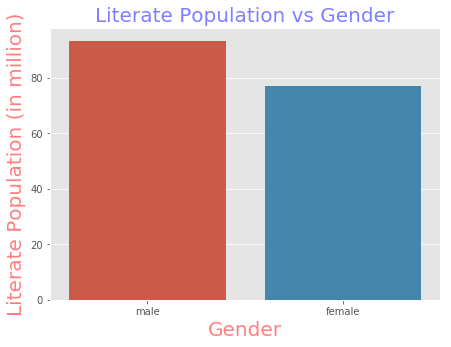

In [5]:
male_lit = sum(cities.literates_male) / 1000000
female_lit = sum(cities.literates_female) / 1000000
lit_df = pd.DataFrame({'Gender':['male', 'female'], 'Population': [male_lit, female_lit]})
plt.subplots(figsize=(7, 5))
ax = sns.barplot(data=lit_df, x='Gender', y='Population')
ax.set_title('Literate Population vs Gender', size=20, color='blue', alpha=0.5)
ax.set_xlabel('Gender', color='red', size=20, alpha=0.5)
ax.set_ylabel('Literate Population (in million)', color='red', size=20, alpha=0.5)

# Top 10 states by literacy

Text(0,0.5,'Number of literates (millions)')

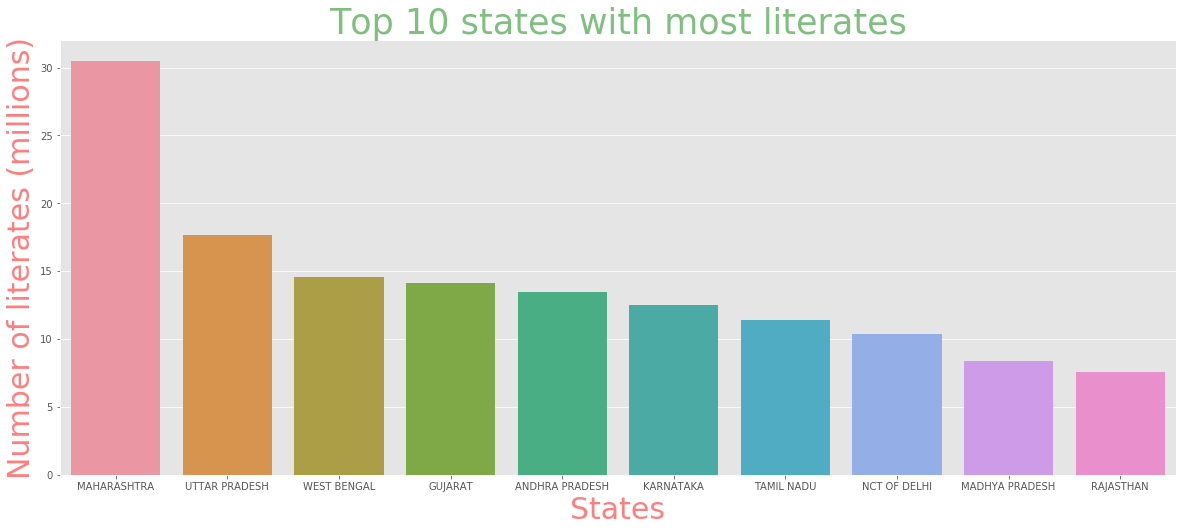

In [6]:
lit_by_states  = cities.groupby('state_name').agg({'literates_total': np.sum}).sort_values([('literates_total')], 
                                                                                           ascending=False)[:10]
lit_by_states = lit_by_states / 1000000
plt.subplots(figsize=(20, 8))
ax = sns.barplot(data=lit_by_states, x=lit_by_states.index, y='literates_total')

ax.set_title('Top 10 states with most literates', size=35, alpha=0.5, color='green')
ax.set_xlabel('States', size=30, alpha=0.5, color='red')
ax.set_ylabel('Number of literates (millions)', size=30, alpha=0.5, color='red')

# States according to literacy rate
>* Literacy rate in eastern states is higher as compared to rest of the India
>* 5 out of 7 states in eastern India are in top 10
>* Most of the northern states have low literacy rate

Text(0,0.5,'States')

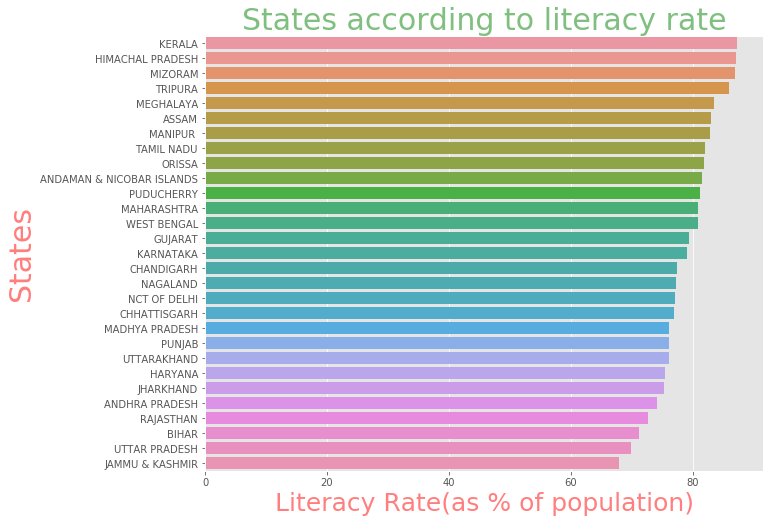

In [7]:
lit_by_states  = cities.groupby('state_name').agg({'literates_total': np.sum})
pop_by_states  = cities.groupby('state_name').agg({'population_total': np.sum})
literate_rate = lit_by_states.literates_total * 100 / pop_by_states.population_total
literate_rate = literate_rate.sort_values(ascending=False)

plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=literate_rate, y=literate_rate.index)
ax.set_title('States according to literacy rate', size=30, alpha=0.5, color='green')
ax.set_xlabel('Literacy Rate(as % of population)', size=25, alpha=0.5, color='red')
ax.set_ylabel('States', size=30, alpha=0.5, color='red')

# States by female literacy rate

Text(0,0.5,'States')

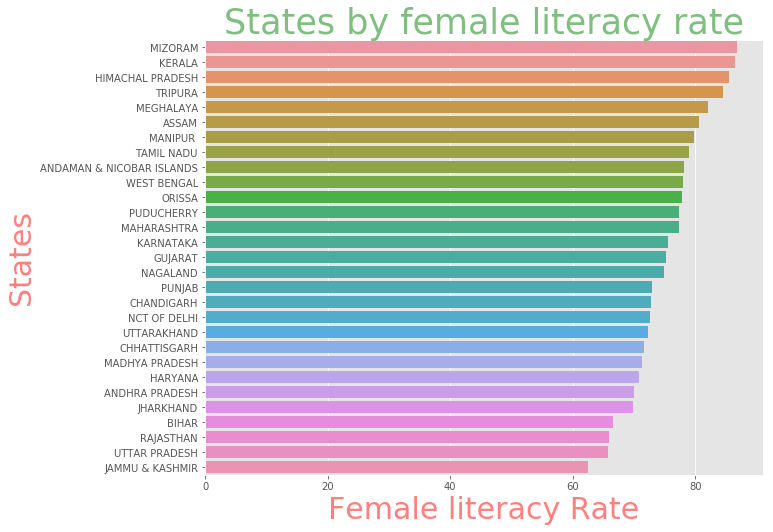

In [8]:
def proportion(group, col1, col2):
    col = group[col1].sum()
    tot_pop = group[col2].sum()
    return (col * 100 / tot_pop)

prop_female_lit = cities.groupby('state_name').apply(proportion, 'literates_female', 'population_female')
prop_male_lit = cities.groupby('state_name').apply(proportion, 'literates_male', 'population_male')

summary = pd.DataFrame({'literates_female': prop_female_lit, 'literates_male':prop_male_lit})
fem_summary = summary.sort_values([('literates_female')], ascending=False)
plt.subplots(figsize=(10, 8))
ax = sns.barplot(x='literates_female', y=fem_summary.index, data=fem_summary)
ax.set_title('States by female literacy rate', size=35, alpha=0.5, color='green')
ax.set_xlabel('Female literacy Rate', size=30, alpha=0.5, color='red')
ax.set_ylabel('States', size=30, alpha=0.5, color='red')

# Is there any relation between sex ratio and female literacy?

Text(0,0.5,'Female literacy(per thousand)')

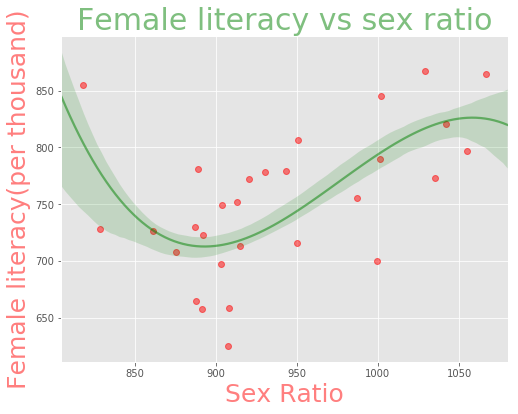

In [9]:
prop_female_lit = cities.groupby('state_name').apply(proportion, 'literates_female', 'population_female')
prop_female_lit = prop_female_lit * 10
sex_ratio1 = cities.groupby('state_name').agg({'sex_ratio':np.mean})
prop_female_lit = pd.DataFrame({'female_lit':prop_female_lit})
df = pd.concat([prop_female_lit, sex_ratio1], axis='columns')
plt.subplots(figsize=(8, 6))
ax = sns.regplot(x='sex_ratio', y='female_lit', data=df, order=3, ci=50, 
                 scatter_kws={'alpha':0.5, 'color':'red'}, 
                 line_kws={'alpha':0.5,'color':'green'})
ax.set_title('Female literacy vs sex ratio', size=30, alpha=0.5, color='green')
ax.set_xlabel('Sex Ratio', size=25, alpha=0.5, color='red')
ax.set_ylabel('Female literacy(per thousand)', size=25, alpha=0.5, color='red')


# States according to number of cities

Text(0,0.5,'States')

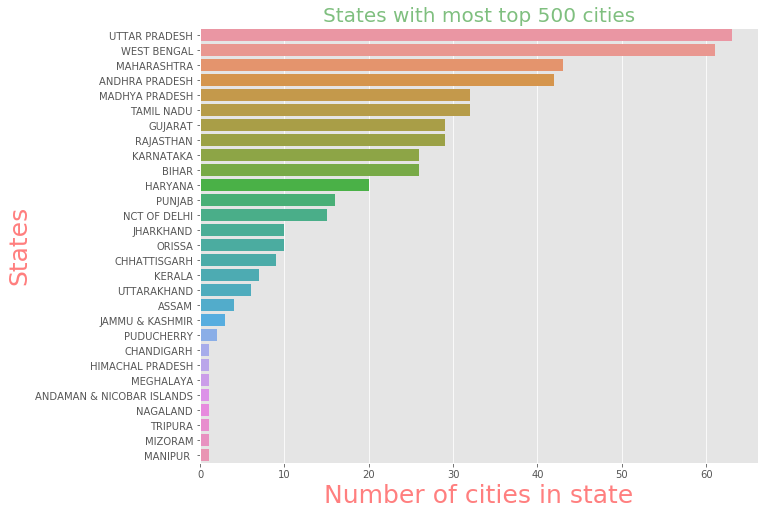

In [10]:
most_cities_in_states = cities.state_name.value_counts().sort_values(ascending=False)

plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=most_cities_in_states, y=most_cities_in_states.index)
ax.set_title('States with most top 500 cities', size=20, alpha=0.5, color='green')
ax.set_xlabel('Number of cities in state', size=25, alpha=0.5, color='red')
ax.set_ylabel('States', size=25, alpha=0.5, color='red')

# Top 10 states with highest population

Text(0,0.5,'Population (millions)')

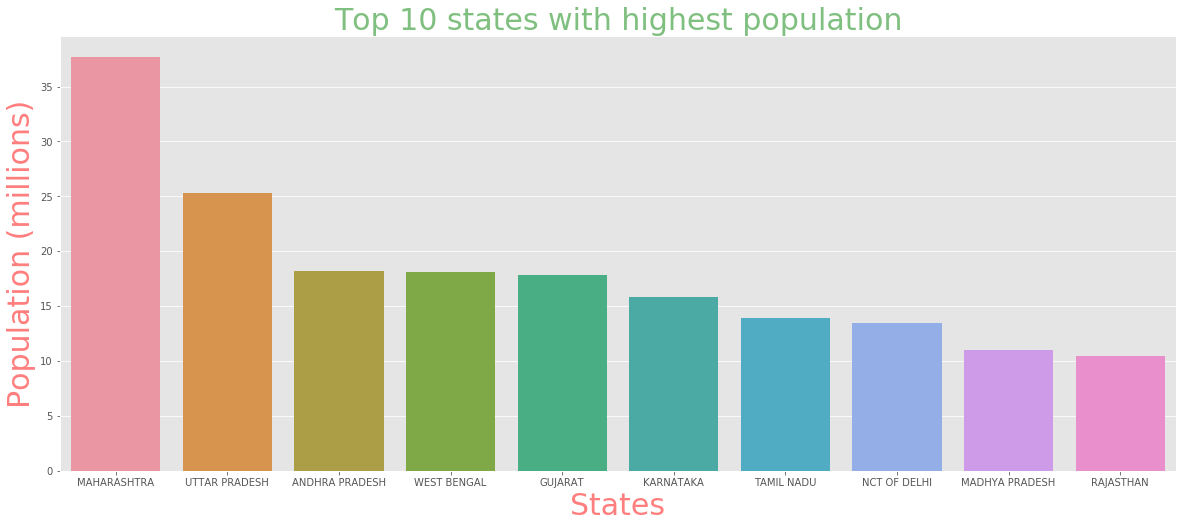

In [11]:
# Top 10 states with highest population
state_by_pop = cities.groupby('state_name').agg({'population_total': np.sum, 
                                                 'population_male': np.sum, 
                                                 'population_female': np.sum}).sort_values([('population_total')], 
                                                                                           ascending=False)[:10]
state_by_pop = state_by_pop / 1000000
plt.subplots(figsize=(20, 8))
ax = sns.barplot(data=state_by_pop, x=state_by_pop.index, y='population_total')
ax.set_title('Top 10 states with highest population', size=30, alpha=0.5, color='green')
ax.set_xlabel('States', size=30, alpha=0.5, color='red')
ax.set_ylabel('Population (millions)', size=30, alpha=0.5, color='red')

In [12]:
cities.pivot_table(index=['state_name'], values=['literates_female', 'female_graduates'], aggfunc=[np.sum])

sum                 
                          female_graduates literates_female
state_name                                                 
ANDAMAN & NICOBAR ISLANDS             5703            37000
ANDHRA PRADESH                     1083014          6285081
ASSAM                               101658           540916
BIHAR                               287753          2097892
CHANDIGARH                           87821           317183
CHHATTISGARH                        193471          1092429
GUJARAT                             863607          6233457
HARYANA                             481353          1959889
...                                    ...              ...
PUDUCHERRY                           39109           213043
PUNJAB                              418865          1981877
RAJASTHAN                           583993          3267301
TAMIL NADU                          962131          5464897
TRIPURA                              22496           169109
UTTAR PRADESH                      1601432          7810410
UTTARAKHAND                         130307           457996
WEST BENGAL                        1107147          6782848

[29 rows x 2 columns]

In [13]:
states_by_sexratio = cities.pivot_table(index=['state_name'], values=['literates_female', 'sex_ratio', 'child_sex_ratio'], 
                   aggfunc={'literates_female':np.sum, 'sex_ratio':np.mean, 'child_sex_ratio':np.mean})
states_by_sexratio = states_by_sexratio.sort_values(['sex_ratio', 'literates_female'], ascending=False)
states_by_sexratio

,child_sex_ratio,literates_female,sex_ratio
state_name,,,
KERALA,957.000000,1228309,1066.714286
MANIPUR,939.000000,108452,1055.000000
MEGHALAYA,937.000000,59893,1042.000000
PUDUCHERRY,976.000000,213043,1035.000000
MIZORAM,989.000000,128332,1029.000000
TRIPURA,940.000000,169109,1002.000000
TAMIL NADU,963.187500,5464897,1001.031250
ANDHRA PRADESH,943.571429,6285081,999.404762
...,...,...,...
